<a href="https://colab.research.google.com/github/SarkarPriyanshu/CognifyzTechnologiesInterns/blob/main/Cognifyz_Technologies_Internship_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly --q
!pip install dash --q
!pip install feature-engine --q
!pip install folium --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


# Task 1.  Restaurant Recommender

## Recommendation Filtering Techniques: Summary and Recommendations
1. **Collaborative Filtering**:
   - Collaborative filtering works by analyzing user-item interactions to identify patterns and similarities among users or items.
   - There are two main approaches:
     - **User-based**: Finds users who are similar to the target user based on their interactions with items. Recommendations are then made based on items liked by similar users.
     - **Item-based**: Identifies similar items based on their interactions with users. Recommendations are made by suggesting items similar to those previously liked by the user.
   - Collaborative filtering doesn't require detailed item information but relies on user-item interaction data.
   - **Advantages**: Doesn't require detailed item information; can capture complex user preferences.
   - **Disadvantages**: Cold-start problem for new users/items; sparsity of data can lead to inaccuracies.
   - **When to choose**: Recommended when you have sufficient user-item interaction data and need personalized recommendations.

2. **Content-Based Filtering**:
   - Content-based filtering recommends items based on their attributes or features, matching them with user preferences.
   - It analyzes the characteristics of items (e.g., text descriptions, metadata) and matches them with user profiles or preferences.
   - Recommendations are made by selecting items that have attributes similar to those liked or interacted with by the user in the past.
   - Content-based filtering doesn't require explicit user interactions but relies on the availability of detailed item information.
   - **Advantages**: Doesn't suffer from the cold-start problem; can recommend niche items.
   - **Disadvantages**: Limited to recommending items similar to past interactions; may not capture serendipitous recommendations.
   - **When to choose**: Suitable when you have detailed item information and want transparent, personalized recommendations.


3. **Demographic Filtering**:
   - Demographic filtering recommends items based on user demographic information such as age, gender, location, or other user characteristics.
   - It doesn't rely on explicit user-item interactions but rather on general preferences within demographic groups.
   - Recommendations are made by selecting items popular among users with similar demographic characteristics.
   - Demographic filtering provides generalized recommendations for broad user segments but may lack personalization.
   - **Advantages**: Can provide generalized recommendations for broad user segments.
   - **Disadvantages**: Oversimplified view of user preferences within demographic groups; limited personalization.
   - **When to choose**: Appropriate when user demographics significantly influence preferences or when targeting specific user segments.

4. **Knowledge-Based Filtering**:
   - Knowledge-based filtering recommends items based on explicit knowledge about user preferences or requirements.
   - It often involves asking users to provide explicit feedback or preferences during the registration or onboarding process.
   - Recommendations are made based on user-provided information such as favorite genres, brands, or attributes.
   - Knowledge-based filtering allows users to express preferences but requires user input and may have limited scalability.
   - **Advantages**: Allows users to express preferences; provides personalized recommendations.
   - **Disadvantages**: Requires user input, limited scalability depending on user knowledge depth.
   - **When to choose**: Suitable when users can provide explicit preferences and personalization is crucial.

5. **Popularity-Based Filtering**:
   - Popularity-based filtering recommends popular items based on overall ratings, reviews, or trends.
   - It doesn't require any user-specific data but provides recommendations based on items liked or purchased by many users.
   - Recommendations are made by suggesting items that are currently popular or highly rated.
   - Popularity-based filtering is simple to implement but may not consider individual preferences and may lead to filter bubbles.
   - **Advantages**: Simple to implement; effective for recommending popular items.
   - **Disadvantages**: Doesn't consider individual preferences; may lead to filter bubbles.
   - **When to choose**: Recommended for users open to trying popular choices or when seeking trending items without relying on individual preferences.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import spearmanr,f_oneway

from dash import Dash, dcc, html
from dash.dependencies import Input, Output

from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from feature_engine.encoding import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,root_mean_squared_error

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Dataset .csv')

### Feature Descriptions

1. **Restaurant ID**: A unique identifier for each restaurant in the dataset.
2. **Restaurant Name**: The name or title of the restaurant.
3. **Country Code**: The country code where the restaurant is located.
4. **City**: The city where the restaurant is located.
5. **Address**: The street address or location of the restaurant.
6. **Locality**: A specific locality or neighborhood within the city where the restaurant is situated.
7. **Locality Verbose**: A more detailed description of the locality, providing additional information or context.
8. **Longitude**: The geographical longitude coordinate of the restaurant's location.
9. **Latitude**: The geographical latitude coordinate of the restaurant's location.
10. **Cuisines**: The type of cuisines offered by the restaurant (e.g., Italian, Indian, Chinese).
11. **Average Cost for two**: The average cost for two people to dine at the restaurant, typically in the local currency.
12. **Currency**: The currency used to denote the average cost for two and other monetary values.
13. **Has Table booking**: Indicates whether the restaurant accepts table bookings (Yes/No or True/False).
14. **Has Online delivery**: Indicates whether the restaurant offers online delivery services (Yes/No or True/False).
15. **Is delivering now**: Indicates whether the restaurant is currently delivering orders (Yes/No or True/False).
16. **Switch to order menu**: An option or link to switch to the restaurant's order menu, if available.
17. **Price range**: A categorical indicator of the price range for dining at the restaurant (e.g., $, $$, $$$).
18. **Aggregate rating**: The overall rating or score of the restaurant, typically based on user reviews or feedback.
19. **Rating color**: The color code representing the rating range (e.g., red for low ratings, green for high ratings).
20. **Rating text**: A textual representation of the rating (e.g., Excellent, Very Good, Average).
21. **Votes**: The number of votes or reviews contributing to the aggregate rating of the restaurant.


In [ ]:
df.sample(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3832,18472658,Oh Boy Lounge,1,New Delhi,"2527, Hudson Lane, 2nd Floor & Terrace, Delhi ...",GTB Nagar,"GTB Nagar, New Delhi",0.00000,0.000000,"North Indian, Chinese, Continental",1000,Indian Rupees(Rs.),No,No,No,No,3,3.1,Orange,Average,5
8458,4248,The Great Kabab Factory,1,Noida,"Ansal's Fortune Arcade, Sector 18, Noida",Sector 18,"Sector 18, Noida",77.32181,28.572104,"North Indian, Mughlai",2200,Indian Rupees(Rs.),Yes,No,No,No,4,3.5,Yellow,Good,540


In [ ]:
df.shape

(9551, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

1 - India  
216 - USA  
215 - UK  
30 - BRAZIL  
214 - UAE  
189 - SOUTH AFRICA  
148 - New Zealand  
208 - TURKEY  
14 - AUSTRALIA  
162 - Philippines  
94 - Indonesia  
184 - Singapore  
166 - Qatar  
191 - Sri Lanka  
37 - CANADA


In [7]:
country_codes = {
    1: 'INDIA',
    216: 'USA',
    215: 'UK',
    30: 'BRAZIL',
    214: 'UAE',
    189: 'SOUTH AFRICA',
    148: 'NEW ZEWLAND',
    208: 'TURKEY',
    14: 'AUSTRALIA',
    162: 'PHILIPPENES',
    94: 'INDONESEA',
    184: 'SINGAPORE',
    166: 'QATAR',
    191: 'SRI LANKA',
    37: 'CANADA'
}


In [8]:
df['Country'] = df['Country Code']
df['Country'] = df['Country'].map(country_codes)

In [ ]:
df.sample(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3003,4237,Costa Coffee,1,New Delhi,"Shop 49, Bengali Market, Connaught Place, New ...",Connaught Place,"Connaught Place, New Delhi",77.232192,28.629256,Cafe,600,Indian Rupees(Rs.),No,No,No,No,2,3.4,Orange,Average,76,INDIA
8742,18470627,Big Biryani,1,Noida,"B Block Market, Sector 50, Noida",Sector 50,"Sector 50, Noida",0.000000,0.000000,"Biryani, Mughlai",300,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0,INDIA
8101,18291236,Rocket Food,1,Noida,"Golf Course, Noida",Golf Course,"Golf Course, Noida",77.345161,28.566350,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0,INDIA


### 1) Demographic Filtering

They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

The formula for calculating the weighted rating (wr) for a restaurant:

weighted rating (wr) = (v / (v + m)) * R + (m / (v + m)) * C

Where:
- v is the number of ratings or reviews for the restaurant.
- R is the average rating of the restaurant.
- C is the mean rating across all restaurants in your dataset.
- m is the minimum number of ratings required for a restaurant to be considered.

You can use this formula to calculate the weighted rating for each restaurant in your dataset, sort the restaurants based on their weighted ratings, and recommend the top-rated restaurants to users. Adjust the values of C and m according to your dataset and preferences.


**Certainly! By using the percentile as the threshold for the minimum number of votes a restaurant must have, we're essentially filtering out restaurants that have received votes equal to or higher than 70% of all the restaurants in the dataset.**


The choice of the threshold, such as 70%, 90%, or any other value, depends on the specific context and objectives of the analysis. It's often determined based on domain knowledge, the distribution of the data, and the desired balance between inclusivity and selectivity. For instance, a higher threshold like 90% may focus on only the top performers, while a lower threshold like 70% may capture a broader range of candidates or entities while still prioritizing higher-performing ones.



**Certainly! Quantiles, such as quartiles or percentiles, are widely used in statistics for various purposes beyond just filtering data. Here are some other important applications:**

1. **Descriptive Statistics**: Quantiles are essential for understanding the distribution of data. They provide insights into the spread and central tendency of a dataset, allowing statisticians to summarize data effectively. For example, the median is the 50th percentile, which divides the data into two equal parts.

2. **Outlier Detection**: Quantiles are useful for identifying outliers in a dataset. By comparing data points to specific quantiles, statisticians can detect values that fall significantly above or below the expected range, indicating potential anomalies or errors in the data.

3. **Forecasting and Risk Management**: In finance and risk management, quantiles are used to estimate the probability of extreme events or losses. For instance, the Value at Risk (VaR) metric measures the maximum potential loss within a specified confidence level, often based on certain quantiles of a financial dataset.

4. **Performance Evaluation**: Quantiles can be employed to evaluate performance in various fields, such as sports, education, or business. For instance, in sports analytics, percentiles are used to rank athletes based on their performance metrics relative to their peers.

5. **Sampling and Survey Analysis**: When conducting surveys or sampling from a population, quantiles help ensure that the sample is representative of the population. Stratified sampling methods often use quantiles to divide the population into homogeneous groups, allowing for more accurate estimates and analysis.

Overall, quantiles play a crucial role in statistical analysis by providing valuable insights into the distribution, variability, and extremities of data, which are essential for making informed decisions in diverse fields.


In [ ]:
df.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
8381,18254314,Sarfira,1,Noida,"B Block Market, Sector 15, Noida",Sector 15,"Sector 15, Noida",0.0,0.0,Fast Food,200,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1,INDIA


In [ ]:
def processTopPerformers(query={},threshold=0.7,top=10):
  filtered_data = df.copy()

  if query.get('Country',None):
    filtered_data = filtered_data.query(f"Country == '{query.get('Country')}'")

  mean_aggregate_rating = filtered_data['Aggregate rating'].mean()

  minimum_votes_criteria = filtered_data['Votes'].quantile(threshold)

  filtered_data = filtered_data[filtered_data['Votes']>=int(minimum_votes_criteria)]


  def calculate_score(data, m=minimum_votes_criteria, C=mean_aggregate_rating):
      v = data['Votes']
      R = data['Aggregate rating']
      return (v/(v+m) * R) + (m/(m+v) * C)


  filtered_data['Score'] = filtered_data.apply(calculate_score,axis=1)

  if top:
    top_performers = filtered_data.nlargest(n=top,columns=['Score'])
    return top_performers

  top_performers = filtered_data
  return top_performers


In [ ]:
# Setting Application
app = Dash(__name__)

# FrontEnd Server
app.layout = html.Div([
    html.Link(
        rel='stylesheet',
        href='https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css'
    ),
    html.Div([
        html.Div([
            html.H1('Top Restaurants', className='text-center text-uppercase text-primary'),
            html.Hr(),
            html.Div([
                html.P('Note:',className='text-uppercase text-warning fw-bold'),
                html.Small('''Threshold : Its a metric that help you set the how percentile of votes a resturant must have.
                              Higher the value shrink the spread, lower the value increase the spread''',className='d-block'),
                html.Small('Top Performer : Its just a value that tells top how many performers you wanna see.',className='d-block'),
                html.Br()
            ],className='bg-light-subtle text-info-emphasis text-start'),
            html.Hr(),
            # Nav bar
            html.Div([
                html.Div([
                    html.Label('Select threshold', className='d-block fw-bold text-info'),
                    html.Small('(This helps to find top voted restaurants.)', className='text-secondary-emphasis'),
                    dcc.Slider(min=5, max=9, step=1, value=7, id='threshold-slider'),
                ],className='col-3'),

                html.Div([
                    html.Label('Select Top Performers', className='d-block fw-bold text-info'),
                    html.Small('(This gives top "n" restaurants.)', className='text-secondary-emphasis'),
                    dcc.Slider(min=1, max=7, step=1, value=5, id='count-slider'),
                ],className='col-3'),

                html.Div([
                  html.Label('Country', className='d-block fw-bold text-info'),
                  html.Small('(Select your country.)', className='text-secondary-emphasis'),
                  dcc.Dropdown(options=list(country_codes.values()), id='country-dropdown'),
                ],className='col-3')

            ], className='d-flex justify-content-between d-flex align-items-center', style={'width':'100%','height': '300px'}),

            # Observation Section
            html.Div([
                # Graph Section
                html.Div([
                    dcc.Graph(id='graph')
                ], style={'width': '100%'}),

                # # Suggestion Sections
                # html.Div([
                #     html.H6('Top 5 Restaurants Suggestions', className='text-center text-uppercase'),
                # ], style={'width': '100%'})

            ], className='d-flex flex-column align-items-stretch',style={'width':'100%'})


        ], className='row d-flex flex-column justify-content-between d-flex align-items-center')
    ], className='container')
], style={'width': '100%', 'height': '100vh', 'margin': '0px', 'padding': '0px', 'box-sizing': 'border-box'})

# Backend Server
@app.callback(
    Output('graph', 'figure'),
    [Input('threshold-slider', 'value'),
     Input('count-slider', 'value'),
     Input('country-dropdown', 'value')]
)
def interact(threshold_value, top_value, selected_country):
    if selected_country is None:
        top_performers = processTopPerformers(query={}, threshold=(threshold_value/10.0), top=top_value)
        fig = px.bar(top_performers, x=top_performers['Restaurant Name'] + ' (' + top_performers['Country'] + ')', y='Score',
                     title='Top Performing Restaurants Worldwide')
        fig.update_traces(text=top_performers['Score'], textposition='auto')
        return fig
    else:
        top_performers = processTopPerformers(query={'Country': selected_country.strip().upper()}, threshold=(threshold_value/10.0), top=top_value)
        fig = px.bar(top_performers, x=top_performers['Restaurant Name'] + ' (' + top_performers['City'] + ')', y='Score',
                     title=f'Top Performing Restaurants in {selected_country.title()}')

        fig.update_traces(text=top_performers['Score'], textposition='auto')
        return fig
    return px.bar()

# App initialization
if __name__ == '__main__':
    app.run_server(debug=True,port=1252)


<IPython.core.display.Javascript object>

### 2) Content Based Filtering

In this recommender system, the content of the restaurants (country code, cuisines, locality, etc.) is used to find its similarity with other restaurants. Then, the restaurants that are most likely to be similar are recommended.

**Plan of Action**

- We have a 'Cuisines' column which we are going to use for building features.
- Mostly, people choose restaurants depending on the location and available cuisines.
- Find similar restaurants using cosine similarity.

**Resources**

- https://www.geeksforgeeks.org/cosine-similarity/.
- https://medium.com/@shachiakyaagba_41915integrating-folium-with-dash-5338604e7c56
- https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75
- https://hackernoon.com/search?query=Recommendation%20System&tab=tags

In [ ]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [ ]:
# Gathering different cuisines in a list so we can create columns names

Cuisines = list()
for value in  df['Cuisines'].str.split(','):
  for item in value:
    if item.strip() not in Cuisines:
      Cuisines.append(item.strip())

In [ ]:
# Create a numpy n dimensional data that matches the default data rows and cuisines columns

CuisinesDataFrame = pd.DataFrame(np.zeros((df.shape[0],len(Cuisines)),dtype=int),columns=Cuisines)

In [ ]:
CuisinesDataFrame.shape,df.shape

((9542, 145), (9542, 22))

In [ ]:
# This is our cuisines dataframe looks like.

CuisinesDataFrame.head()

,French,Japanese,Desserts,Seafood,Asian,Filipino,Indian,Sushi,Korean,Chinese,European,Mexican,American,Ice Cream,Cafe,Italian,Pizza,Bakery,Mediterranean,Fast Food,Brazilian,Arabian,Bar Food,Grill,International,Peruvian,Latin American,Burger,Juices,Healthy Food,Beverages,Lebanese,Sandwich,Steak,BBQ,Gourmet Fast Food,Mineira,North Eastern,Coffee and Tea,Vegetarian,Tapas,Breakfast,Diner,Southern,Southwestern,Spanish,Argentine,Caribbean,German,Vietnamese,Thai,Modern Australian,Teriyaki,Cajun,Canadian,Tex-Mex,Middle Eastern,Greek,Bubble Tea,Tea,Australian,Fusion,Cuban,Hawaiian,Salad,Irish,New American,Soul Food,Turkish,Pub Food,Persian,Continental,Singaporean,Malay,Cantonese,Dim Sum,Western,Finger Food,British,Deli,Indonesian,North Indian,Mughlai,Biryani,South Indian,Pakistani,Afghani,Hyderabadi,Rajasthani,Street Food,Goan,African,Portuguese,Gujarati,Armenian,Mithai,Maharashtrian,Modern Indian,Charcoal Grill,Malaysian,Burmese,Chettinad,Parsi,Tibetan,Raw Meats,Kerala,Belgian,Kashmiri,South American,Bengali,Iranian,Lucknowi,Awadhi,Nepalese,Drinks Only,Oriya,Bihari,Assamese,Andhra,Mangalorean,Malwani,Cuisine Varies,Moroccan,Naga,Sri Lankan,Peranakan,Sunda,Ramen,Kiwi,Asian Fusion,Taiwanese,Fish and Chips,Contemporary,Scottish,Curry,Patisserie,South African,Durban,Kebab,Turkish Pizza,Izgara,World Cuisine,D�_ner,Restaurant Cafe,B�_rek
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
CuisinesDataFrame.shape

(9542, 145)

In [ ]:
# This one is important
# here we are iterating over resturant data grabing it Cuisines column split the text
# iterating over those Cuisines list
# matches the Cuisines column name in Cuisines dataframe we had created and add 1 rest to 0

for index,cuisines_list in enumerate(df['Cuisines'].str.split(',')):
  for cuisines in cuisines_list:
    CuisinesDataFrame[cuisines.strip()].iloc[index] = 1

In [ ]:
# This features we are going to use to find similarity amoung restaurants.
selected_columns = ['Country Code',
                    'Longitude',
                    'Latitude',
                    'Has Table booking',
                    'Has Online delivery',
                    'Is delivering now',
                    'Switch to order menu',
                    'Price range',
                    'Aggregate rating','Votes']

feature_df = df[selected_columns]

In [ ]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9542 non-null   int64  
 1   Longitude             9542 non-null   float64
 2   Latitude              9542 non-null   float64
 3   Has Table booking     9542 non-null   object 
 4   Has Online delivery   9542 non-null   object 
 5   Is delivering now     9542 non-null   object 
 6   Switch to order menu  9542 non-null   object 
 7   Price range           9542 non-null   int64  
 8   Aggregate rating      9542 non-null   float64
 9   Votes                 9542 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 745.6+ KB


In [ ]:
# Handling categorical features

feature_df = pd.get_dummies(data=feature_df,
                            drop_first=True,
                            columns=['Has Table booking',
                                     'Has Online delivery',
                                     'Is delivering now',
                                     'Switch to order menu'],
                            dtype=int)

In [ ]:
# Concatating the CuisinesDataFrame we had created with Selected features dataframe

content_feature_df = pd.concat((feature_df,CuisinesDataFrame),axis=1)

In [ ]:
content_feature_df.head(3)

,Country Code,Longitude,Latitude,Price range,Aggregate rating,Votes,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,French,Japanese,Desserts,Seafood,Asian,Filipino,Indian,Sushi,Korean,Chinese,European,Mexican,American,Ice Cream,Cafe,Italian,Pizza,Bakery,Mediterranean,Fast Food,Brazilian,Arabian,Bar Food,Grill,International,Peruvian,Latin American,Burger,Juices,Healthy Food,Beverages,Lebanese,Sandwich,Steak,BBQ,Gourmet Fast Food,Mineira,North Eastern,Coffee and Tea,Vegetarian,Tapas,Breakfast,Diner,Southern,Southwestern,Spanish,Argentine,Caribbean,German,Vietnamese,Thai,Modern Australian,Teriyaki,Cajun,Canadian,Tex-Mex,Middle Eastern,Greek,Bubble Tea,Tea,Australian,Fusion,Cuban,Hawaiian,Salad,Irish,New American,Soul Food,Turkish,Pub Food,Persian,Continental,Singaporean,Malay,Cantonese,Dim Sum,Western,Finger Food,British,Deli,Indonesian,North Indian,Mughlai,Biryani,South Indian,Pakistani,Afghani,Hyderabadi,Rajasthani,Street Food,Goan,African,Portuguese,Gujarati,Armenian,Mithai,Maharashtrian,Modern Indian,Charcoal Grill,Malaysian,Burmese,Chettinad,Parsi,Tibetan,Raw Meats,Kerala,Belgian,Kashmiri,South American,Bengali,Iranian,Lucknowi,Awadhi,Nepalese,Drinks Only,Oriya,Bihari,Assamese,Andhra,Mangalorean,Malwani,Cuisine Varies,Moroccan,Naga,Sri Lankan,Peranakan,Sunda,Ramen,Kiwi,Asian Fusion,Taiwanese,Fish and Chips,Contemporary,Scottish,Curry,Patisserie,South African,Durban,Kebab,Turkish Pizza,Izgara,World Cuisine,D�_ner,Restaurant Cafe,B�_rek
0,162,121.027535,14.565443,3,4.8,314,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,162,121.014101,14.553708,3,4.5,591,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,162,121.056831,14.581404,4,4.4,270,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(f'No of columns in content_feature_df : {len(content_feature_df.columns)}')

No of columns in content_feature_df : 154


In [ ]:
content_feature_df.isna().sum().sum()

0

In [ ]:
# Calculating cosine similarity

cosine_sim = linear_kernel(content_feature_df, content_feature_df)

In [ ]:
# This dataframe is for indexing purpose to find the resturant name given by the user

info_df = df[['City','Country','Country Code','Restaurant Name','Cuisines','Longitude','Latitude']]

In [ ]:
def getSimilarResturants(name=None,top=5):

  # find the resturant in indexing data
  index_df = info_df.query(f'`Restaurant Name` == "{name}"')

  # grap the index so we can check it in cosine matrix
  index = index_df.index[0]

  # find the similarity score
  sim_scores = list(enumerate(cosine_sim[index]))

  # sort them scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # grab the sorted indexes
  indexes = [i[0] for i in sim_scores]

  # Filter similarity based on country
  return info_df.iloc[indexes].query(f"`Country` == '{index_df['Country'].iloc[0]}'").iloc[:top,:]

In [ ]:
# Setting Application
app = Dash(__name__)

# FrontEnd Server
app.layout = html.Div([
    html.Link(
        rel='stylesheet',
        href='https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css'
    ),
    html.Div([
        html.H1('Restaurant Recommendations',className='text-center text-primary'),
        html.Br(),
        html.Div([

            html.Div([
              html.Label('Select Country', className='d-block text-start fw-bold text-primary'),
              html.Small('(Select Country.)', className='text-secondary-emphasis text-start d-block'),
              html.Br(),
              dcc.Dropdown(df['Country'].unique(),id='country-dropdown')
            ],className='col-4'),

            html.Div([
              html.Label('Select Restaurant Name', className='d-block text-start fw-bold text-primary'),
              html.Small('(Find Similar Restaurant.)', className='text-secondary-emphasis text-start d-block'),
              html.Br(),
              dcc.Dropdown(list(),id='restaurant-dropdown',disabled=True)
            ],className='col-5')

        ],className="row d-flex justify-content-between align-items-center"),

        html.Div([],className='w-100',id='suggestion-section')
      ],className="container w-100")
    ],style={'width': '100%', 'margin': '0px', 'padding': '0px', 'box-sizing': 'border-box'})

# Backend Server
@app.callback(
    Output('restaurant-dropdown', 'disabled'),
    Output('restaurant-dropdown', 'options'),
    Output('suggestion-section','children'),
    Input('country-dropdown', 'value'),
    Input('restaurant-dropdown', 'value')
)
def interact(selected_country,resturant_name):
  if (selected_country is not None) and (resturant_name is None):
    filtered_data = df.query(f'`Country` == "{selected_country}"')
    return False,list(filtered_data['Restaurant Name'].unique()),'',


  if (selected_country is not None) and (resturant_name is not None):
    Cuisines = list()

    # This is to grab city of particular country which got selected
    filtered_data = df.query(f'`Country` == "{selected_country}"')

    # Get top Similar resturants
    resturants_data = getSimilarResturants(resturant_name.strip(),top=5)

    # Get Cuisines based on which our filtering occurs
    for values in resturants_data['Cuisines'].str.split(','):
      Cuisines.extend([item.strip() for item in values])

    Cuisines = list(set(Cuisines))

    component = html.Div([
        html.Br(),
        html.Br(),
        html.H2('Top 5 Suggestions',className='text-center text-primary'),
        html.Br(),
        html.Div([html.P(f"{resturants_data['Restaurant Name'].iloc[index]}\n({resturants_data['City'].iloc[index]})",
                         style={'padding':'0px 5px'},
                         className='w-25 text-capitalize fw-bold text-info align-items-center') for index in range(len(resturants_data))],
                                                                         className='d-flex align-items-center flex-wrap',
                                                                         style={'margin':'20px 0px','list-style':'none'}),
        html.H2('Top Similar Cuisines',className='text-center text-primary'),
        html.Div([html.P(Cuisine,
                         style={'padding':'0px 5px'},
                         className='w-25 text-capitalize fw-bold text-info align-items-center') for Cuisine in Cuisines],
                                                                         className='d-flex align-items-center flex-wrap',
                                                                         style={'margin':'20px 0px','list-style':'none'})
    ])

    return False,list(filtered_data['Restaurant Name'].unique()),component

  return True,list(),''


# App initialization
if __name__ == '__main__':
    app.run_server(debug=True,port=1226)


<IPython.core.display.Javascript object>

# Task 2. Predict Resturants Rating

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Dataset .csv')

### Feature Descriptions

1. **Restaurant ID**: A unique identifier for each restaurant in the dataset.
2. **Restaurant Name**: The name or title of the restaurant.
3. **Country Code**: The country code where the restaurant is located.
4. **City**: The city where the restaurant is located.
5. **Address**: The street address or location of the restaurant.
6. **Locality**: A specific locality or neighborhood within the city where the restaurant is situated.
7. **Locality Verbose**: A more detailed description of the locality, providing additional information or context.
8. **Longitude**: The geographical longitude coordinate of the restaurant's location.
9. **Latitude**: The geographical latitude coordinate of the restaurant's location.
10. **Cuisines**: The type of cuisines offered by the restaurant (e.g., Italian, Indian, Chinese).
11. **Average Cost for two**: The average cost for two people to dine at the restaurant, typically in the local currency.
12. **Currency**: The currency used to denote the average cost for two and other monetary values.
13. **Has Table booking**: Indicates whether the restaurant accepts table bookings (Yes/No or True/False).
14. **Has Online delivery**: Indicates whether the restaurant offers online delivery services (Yes/No or True/False).
15. **Is delivering now**: Indicates whether the restaurant is currently delivering orders (Yes/No or True/False).
16. **Switch to order menu**: An option or link to switch to the restaurant's order menu, if available.
17. **Price range**: A categorical indicator of the price range for dining at the restaurant (e.g., $, $$, $$$).
18. **Aggregate rating**: The overall rating or score of the restaurant, typically based on user reviews or feedback.
19. **Rating color**: The color code representing the rating range (e.g., red for low ratings, green for high ratings).
20. **Rating text**: A textual representation of the rating (e.g., Excellent, Very Good, Average).
21. **Votes**: The number of votes or reviews contributing to the aggregate rating of the restaurant.


### Basic Analysis

In [ ]:
df.sample(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
7260,18400759,Spice Sea,1,New Delhi,"C 19-20-21, CC Block Market, Shalimar Bagh, Ne...",Shalimar Bagh,"Shalimar Bagh, New Delhi",77.158627,28.719446,"North Indian, Chinese",600,Indian Rupees(Rs.),No,No,No,No,2,3.3,Orange,Average,13
5857,18366028,Chicago Pizza,1,New Delhi,"G-41, Agarwal Millenium Tower 1, Netaji Subhas...",Netaji Subhash Place,"Netaji Subhash Place, New Delhi",77.149730,28.693788,"Fast Food, Italian, Pizza",500,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,42
3684,5797,Prince Chaat Corner,1,New Delhi,"M-29, Greater Kailash (GK) 1, New Delhi",Greater Kailash (GK) 1,"Greater Kailash (GK) 1, New Delhi",77.236268,28.549474,Street Food,250,Indian Rupees(Rs.),No,No,No,No,1,3.7,Yellow,Good,84


In [ ]:
country_codes = {
    1: 'INDIA',
    216: 'USA',
    215: 'UK',
    30: 'BRAZIL',
    214: 'UAE',
    189: 'SOUTH AFRICA',
    148: 'NEW ZEWLAND',
    208: 'TURKEY',
    14: 'AUSTRALIA',
    162: 'PHILIPPENES',
    94: 'INDONESEA',
    184: 'SINGAPORE',
    166: 'QATAR',
    191: 'SRI LANKA',
    37: 'CANADA'
}

In [ ]:
df['Country'] = df['Country Code']
df['Country'] = df['Country'].map(country_codes)

In [ ]:
df.drop('Country Code',axis=1,inplace=True)

In [ ]:
df.shape

(9551, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [ ]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
numeric_data = df.select_dtypes(include=['int','float'])\
.drop(['Restaurant ID'],axis=1)

numericStats = numeric_data.describe().T
numericStats['Skew'] = numeric_data.skew()
numericStats['Kurtosis'] = numeric_data.kurtosis()


numericStats.style.background_gradient(cmap='PuBu',axis=0)

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
Longitude,9551.000000,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089,-2.807328,8.216586
Latitude,9551.000000,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.976980,-3.081635,12.530803
Average Cost for two,9551.000000,1199.210763,16121.183073,0.000000,250.000000,400.000000,700.000000,800000.000000,35.477915,1495.777394
Price range,9551.000000,1.804837,0.905609,1.000000,1.000000,2.000000,2.000000,4.000000,0.889618,-0.142550
Aggregate rating,9551.000000,2.666370,1.516378,0.000000,2.500000,3.200000,3.700000,4.900000,-0.954130,-0.582217
Votes,9551.000000,156.909748,430.169145,0.000000,5.000000,31.000000,131.000000,10934.000000,8.807637,128.225969


In [ ]:
df\
.select_dtypes(exclude=['int','float'])\
.describe().T\
.style.background_gradient(cmap='PuBu',axis=0)

,count,unique,top,freq
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Dilli Haat, INA, New Delhi",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9542,1825,North Indian,936
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517


### Remove useless values

- Columns have 0 values

In [ ]:
remove_index = df.query("Votes==0 and Latitude == 0.000000 and Longitude == 0.000000").index

In [ ]:
df['Votes'].value_counts().head()

Votes
0    1094
1     483
2     327
3     244
4     207
Name: count, dtype: int64

In [ ]:
df.drop(remove_index,axis=0,inplace=True)

In [ ]:
print(f'{len(remove_index)/df.shape[0]*100:.4f} % value out of total observations in Votes, Longitude and Latitude have value 0 in it.')

1.8665 % value out of total observations in Votes, Longitude and Latitude have value 0 in it.


In [ ]:
df.shape

(9376, 21)

In [ ]:
df['Latitude'].value_counts().head()

Latitude
0.000000     323
28.574309     16
28.551456      9
28.574300      9
28.597103      8
Name: count, dtype: int64

In [ ]:
df['Longitude'].value_counts().head()

Longitude
0.000000     323
77.353663     19
77.230412     12
77.088688     10
77.251426      9
Name: count, dtype: int64

In [ ]:
remove_index = df.query("Latitude == 0.000000 and Longitude == 0.000000").index

In [ ]:
df.drop(remove_index,axis=0,inplace=True)

In [ ]:
print(f'{len(remove_index)/df.shape[0]*100:.4f} % value out of total observations in Longitude and Latitude have value 0 in it.')

3.5564 % value out of total observations in Longitude and Latitude have value 0 in it.


In [ ]:
df.shape

(9054, 21)

In [ ]:
df['Longitude'].value_counts().head()

Longitude
77.353663    19
77.230412    12
77.088688    10
77.353574     9
77.251426     9
Name: count, dtype: int64

In [ ]:
df['Latitude'].value_counts().head()

Latitude
28.574309    16
28.551456     9
28.574300     9
28.597103     8
28.625445     7
Name: count, dtype: int64

- Removed the rows with value 0 in Longitute and Latitude.

In [ ]:
df['Aggregate rating'].value_counts().head()

Aggregate rating
0.0    1864
3.2     506
3.1     494
3.4     483
3.3     472
Name: count, dtype: int64

In [ ]:
1864/df.shape[0] * 100

20.587585597525955

- 20% of the observations in Aggregate rating have 0 in it.

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

### Feature Selection

In [ ]:
feature_to_Select = list()

#### Numerica Feature Selection
  - The Spearman rank-order correlation coefficient Test
  - **Assumtion 1 (Linear relation)** : There is no linear relation between numerical features and target column

In [ ]:
for feature in df.select_dtypes(include=['int','float']).columns:
  if feature not in ['Restaurant ID','Aggregate rating']:
    statistic,p_value= spearmanr(df[feature],df['Aggregate rating'])
    if p_value < 0.05:
      feature_to_Select.append(feature)
      fig = px.scatter(df,x=feature,y='Aggregate rating',title=f'{feature} and Agg rating are associated p_value: {p_value:.4f}')
      fig.show()
    else:
      fig = px.scatter(df,x=feature,y='Aggregate rating',title=f'{feature} and Agg rating not associated p_value: {p_value:.4f}')
      fig.show()

##### observation
  - features like `votes`, `price range`, `avg cost`, `long` and `lat` shows association with target column `agg rating`

#### Categorical Feature Selection
  - Analysis of Variance Test (ANOVA)

In [ ]:
cat_feature = df.select_dtypes(include='object').columns

In [ ]:
print('Feature Cardinality\n')
for feature in df.select_dtypes(include='object').columns:
  print(f'{feature:{20}} : {df[feature].nunique()}')

Feature Cardinality

Restaurant Name      : 7020
City                 : 140
Address              : 8460
Locality             : 1174
Locality Verbose     : 1227
Cuisines             : 1755
Currency             : 12
Has Table booking    : 2
Has Online delivery  : 2
Is delivering now    : 2
Switch to order menu : 1
Rating color         : 6
Rating text          : 6
Country              : 15


In [ ]:
def calculate_anova(feature=None,data=None):
  data = data.copy()
  if data[feature].nunique() > 1 and data[feature].nunique() < 20:
    f_statistic, p_value = f_oneway(*[[value for value, group in zip(data['Aggregate rating'], data[feature]) if group == cat] for cat in data[feature].unique()])
    if p_value < 0.05:
      feature_to_Select.append(feature)
      print(f'{feature} : associated with agg rating, p_value: {p_value:.6f}')
    else:
       print(f'{feature} is not associated with agg rating with p_value: {p_value:.6f}')

for feature in cat_feature:
  calculate_anova(feature,df)

Currency : associated with agg rating, p_value: 0.000000
Has Table booking : associated with agg rating, p_value: 0.000000
Has Online delivery : associated with agg rating, p_value: 0.000000
Is delivering now is not associated with agg rating with p_value: 0.093479
Rating color : associated with agg rating, p_value: 0.000000
Rating text : associated with agg rating, p_value: 0.000000
Country : associated with agg rating, p_value: 0.000000


In [ ]:
feature_to_Select

['Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Votes',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Rating color',
 'Rating text',
 'Country']

In [ ]:
feature_to_Select.insert(5,'Aggregate rating')
feature_to_Select.remove('Rating color')
one_hot_encod_features = ['Has Table booking','Has Online delivery','Country','Currency']
ordinal_encod_features = ['Rating text']

In [ ]:
data = df[feature_to_Select]

**Assumtion 2** : Is there any multi-colinearity present in data

  - There is no multi-colinearity present in numerical columns

<Axes: >

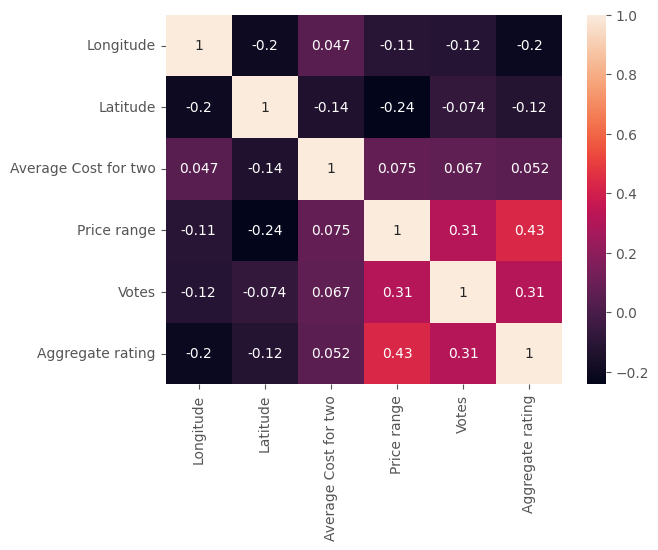

In [ ]:
sns.heatmap(data.select_dtypes(exclude='object').corr(),annot=True)

### Feature Engineering & Model Building

In [ ]:
X = data.drop('Aggregate rating',axis=1)
y = data['Aggregate rating']

In [ ]:
X_train, X_other, y_train, y_other =  train_test_split(X,y,test_size=0.3,random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=0.3,random_state=101)

In [ ]:
print(f'Traning size: {X_train.shape}\nValidation size: {X_val.shape}\nTest size: {X_test.shape}')

Traning size: (6331, 10)
Validation size: (1899, 10)
Test size: (815, 10)


In [ ]:
pipe = Pipeline([('OneHotEncoder', OneHotEncoder(variables=one_hot_encod_features,drop_last=True)),
                 ('OrdinalEncoder', OrdinalEncoder(variables=ordinal_encod_features)),
                 ('RobustScaler',RobustScaler()),
                 ('LinearRegression',LinearRegression())
                 ])

In [ ]:
pipe = pipe.fit(X_train,y_train)

#### Model Evaluation

In [ ]:
X_train_pred = pipe.predict(X_train)

In [ ]:
print(f'Validation r2_score: {r2_score(y_train,X_train_pred)}\nValidation root mean square: {root_mean_squared_error(y_train,X_train_pred)}')

(0.9045987204631056, 0.4572986987793554)

In [ ]:
X_val_pred = pipe.predict(X_val)

In [ ]:
print(f'Validation r2_score: {r2_score(y_val,X_val_pred)}\nValidation root mean square: {root_mean_squared_error(y_val,X_val_pred)}')

Validation r2_score: 0.9028885248514203
Validation root mean square: 0.45755663541033337


In [ ]:
# Create the DataFrame
coef_dict = dict(zip(pipe['OrdinalEncoder'].feature_names_in_, pipe['LinearRegression'].coef_))
df_coef = pd.DataFrame(coef_dict.items(), columns=['features', 'coef'])

In [ ]:
df_coef = df_coef.sort_values('coef',ascending=False)
fig = px.bar(df_coef, x='features', y='coef', title='Coefficients from Linear Regression Model')

# Customize layout if needed
fig.update_layout(xaxis_title='Features', yaxis_title='Coefficient')

# Show the plot
fig.show()

#### Observations
  - Country column have a vital role in predicting the rating of a resturant
  - in +ve end `Rating text` is one column that we can interpret rest are just country columns with 0's or 1's.
  - Columns like `locality (Longitude/Latitude)`, or based on resturant features like `Price range`, `Votes or Average cost of two` are nearly 0 affect in predicting the `Agg Rating`
  - Despite this our model can explain around `0.90459` of traning data and when validated it areound `0.9028
  - So as `Root mean square error` of traning is `0.45` and val is `0.45` so can can say our model is `+-0.45  points` off from its real values in terms of predictions  

### Final Result on Unseen Data

In [ ]:
X_test_pred = pipe.predict(X_test)
print(f'Test r2_score: {r2_score(y_test,X_test_pred)}\nTest root mean square: {root_mean_squared_error(y_test,X_test_pred)}')

Test r2_score: 0.8914719860953728
Test root mean square: 0.4788720234575175


In [ ]:
residuels = y_test - X_test_pred

**Assumtion 3 (Noramlity in residuels)**

In [ ]:
fig = px.histogram(residuels,title='Histogram of Residuels from Linear Regression Model')

# Show the plot
fig.show()

**Assumtion 4 (Homosedasticity)**

In [ ]:
fig = px.scatter(x=X_test_pred, y=residuels, title='Scatter Plot of Homosedasticity of Linear Regression Model')

fig.show()

**Assumtion 5 (Auto correlation of residuels)**

In [ ]:
fig = px.line(residuels, title='Line Plot of residuels from Linear Regression Model')

fig.show()

# Task 3. Location Based Analysis

**Objective**: Perform a geographical analysis of the
restaurants in the dataset.

Steps:

- Explore the latitude and longitude coordinates of
the restaurants and visualize their distribution on a
map.
- Group the restaurants by city or locality and
analyze the concentration of restaurants in
different areas.
- Calculate statistics such as the average ratings,
cuisines, or price ranges by city or locality.
Identify any interesting insights or patterns related
to the locations of the restaurants.

In [9]:
df.shape

(9551, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Data Cleaning (Removing null and 0's)

In [11]:
df.dropna(inplace=True)

In [12]:
remove_index = df.query("Latitude == 0.000000 and Longitude == 0.000000").index

In [14]:
df.drop(remove_index,axis=0,inplace=True)

In [16]:
df.reset_index(drop=True,inplace=True)

In [17]:
df.shape

(9045, 22)

### EDA

 ***Explore the latitude and longitude coordinates of the restaurants and visualize their distribution on a map.***

***Group the restaurants by city or locality and analyze the concentration of restaurants in different areas.***

In [86]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermapbox(
    lat=df['Latitude'],
    lon=df['Longitude'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['Aggregate rating'],
        colorscale='YlGnBu',
        cmin=0,
        cmax=5,
        colorbar=dict(title='Aggregate Rating'),
    ),
))


fig.update_layout(
    title="Scatter plot of restaurants as per locality city and rating",
    mapbox_style='carto-positron',
    mapbox_zoom=10,
)


fig.show()

***Calculate statistics such as the average ratings, cuisines, or price ranges by city or locality. Identify any interesting insights or patterns related to the locations of the restaurants.***

In [72]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')


In [56]:
grouped_by_country = df.groupby('Country',as_index=False)\
.agg({'Aggregate rating':'mean','Price range':'mean','Votes':'mean'})

In [71]:
grouped_by_country.sort_values('Votes',ascending=False).head()

,City,Aggregate rating,Price range,Votes
14,Bangalore,4.375,2.70,2805.75
63,Kolkata,4.255,2.85,2229.65
83,Mumbai,4.085,2.75,1484.85
26,Chennai,4.315,2.45,1384.75
123,Tampa Bay,4.410,2.55,1370.35


**Observations**
  - `PHILIPPENES`,`INDONESEA` and `TURKEY` have highest number of resturant with high `Average aggregate rating`
  - `CANADA`, `SINGAPORE` and `INDIA` are at the bottom with `Average aggregate rating`
  - `QATAR`,`SINGAPORE` and `SOUTH AFRICA` have most expensive resturants on average.
  - `AUSTRALIA`, `USA` and `INDIA` have last 3 countries with least expensive resturants on average
  - `INDONESEA`, `UAE` and `TURKEY` reaturants on average have highest no of votes.
  - `BRAZIL`,`SINGAPORE` and `CANADA` reaturants on average have least no of votes.

In [66]:
grouped_by_city = df.groupby(['Country','City'],as_index=False)\
.agg({'Aggregate rating':'mean','Price range':'mean','Votes':'mean'})

In [70]:
grouped_by_city.sort_values('Votes',ascending=False).head()

,Country,City,Aggregate rating,Price range,Votes
35,INDIA,Bangalore,4.375,2.70,2805.75
52,INDIA,Kolkata,4.255,2.85,2229.65
57,INDIA,Mumbai,4.085,2.75,1484.85
39,INDIA,Chennai,4.315,2.45,1384.75
134,USA,Tampa Bay,4.410,2.55,1370.35


**Observations**
  - `Inner City` resturants of `SOUTH AFRICA`, `Quezon City` of resturants `PHILIPPENES` and `Makati City` of resturants `PHILIPPENES` are top in terms of `Average aggregate rating`

  - `Faridabad` of resturants `INDIA`, `Noida` of resturants `INDIA` and `Montivilla` of resturants `AUSTRALIA` are at last in terms of `Average aggregate rating`

  - `Pasay City` of resturants `PHILIPPENES`, `Johannesburg` of resturants `SOUTH AFRICA` and `Panchkula` of resturants `INDIA` are top in terms of `Average price range`

  - `Dicky Beach` of resturants `AUSTRALIA`, `Vernonia` of
   resturants `USA` and `Mc Millan` of resturants `USA` are at last in terms of `Average price range`

  - `Bangalore` of resturants `INDIA`, `Kolkata` of resturants `INDIA` and `Mumbai City` resturants of `INDIA` are top in terms of `Average votes`

  - `Potrero` of resturants `USA`, `Cochrane` of resturants `USA` and `Consort` of resturants `CANADA` are at last in terms of `Average aggregate rating`

In [73]:
grouped_by_city = df.groupby(['Country','City','Cuisines'],as_index=False)\
.agg({'Aggregate rating':'mean','Price range':'mean','Votes':'mean'})

In [81]:
grouped_by_city.sort_values('Votes',ascending=False).head()

,Country,City,Cuisines,Aggregate rating,Price range,Votes
157,INDIA,Bangalore,"Italian, American, Pizza",4.8,4.0,10934.0
146,INDIA,Bangalore,"American, Burger, Cafe",4.7,2.0,9667.0
831,INDIA,Kolkata,"Continental, North Indian",4.3,3.0,7574.0
155,INDIA,Bangalore,"European, Mediterranean, North Indian",4.6,3.0,6907.0
156,INDIA,Bangalore,"Finger Food, North Indian, Italian, Continenta...",4.5,3.0,5705.0


**Observations**

- American, Coffee, Tea, Italian, Bakery, Continental,European, German, British, Italian are the `highest average rating cuisines`